# Dual Graphs

The main object we will use for representing the geospatial data for redistricting is a **dual graph** where the nodes represent geographic units like census blocks or precincts and the edges represent physical adjacency. The GerryChain package includes a `graph` object that extends the standard networkx object. If you'd like to learn more about working with arbitrary graphs and network analysis, I have a separate set of materials on that topic here: https://github.com/drdeford/CISER2023NetworkX 

In this initial part of the notebook we'll load in some previously created dual graphs from .json files and look at their annotations and visualizations.

In [1]:
import networkx as nx
from networkx.readwrite import json_graph
from gerrychain import Graph
import matplotlib.pyplot as plt
import requests
import json


The simplest way to work with a dual graph is to have a copy of the corresponding .json stored locally on your computer (we'll look at ways to create them from shapefiles below). The data directory contains some examples for us to work with for now that we can load in with Graph.from_json(). The grid is a toy example, while the counties from Iowa and the precincts from Washington represent real data. 

In [2]:
grid = Graph.from_json("./Dual_Graphs/orange_pink_grid.json")
IA_Counties = Graph.from_json("./Dual_Graphs/IA_Counties.json")
WA_2020 = Graph.from_json("./Dual_Graphs/WA_2020_w_plans_votes_t.json")



A convenient feature of networkx graphs is that they can store arbitrary attributes on the nodes and edges. This is useful for us since we want to keep track of things like population, vote totals, and what county contains each unit, as well as geographic information like the position of the centroid of each unit (for plotting) or the length of the boundary between each pair of adjacent units for computing compactness scores. These can be accessed using the graph.nodes() syntax:  

In [3]:
grid.nodes()[0]

{'color': 'pink',
 'pink': 1,
 'orange': 0,
 'D1': 0,
 'D2': 0,
 'D4': 0,
 'D5': 0,
 'D3': 3,
 'Population': 1,
 'C_X': 0,
 'C_Y': 0}

In [4]:
IA_Counties.nodes()[0]

{'boundary_node': False,
 'area': 0.1614125951439999,
 'STATEFP10': '19',
 'COUNTYFP10': '127',
 'GEOID10': 19127,
 'NAME10': 'Marshall',
 'NAMELSAD10': 'Marshall County',
 'ALAND10': 1482770678,
 'AWATER10': 1803086,
 'INTPTLAT10': '+42.0416910',
 'INTPTLON10': '-092.9814523',
 'TOTPOP': 40648,
 'NH_WHITE': 31807,
 'NH_BLACK': 629,
 'NH_AMIN': 104,
 'NH_ASIAN': 526,
 'NH_NHPI': 39,
 'NH_OTHER': 33,
 'NH_2MORE': 493,
 'HISP': 7017,
 'H_WHITE': 4264,
 'H_BLACK': 50,
 'H_AMIN': 82,
 'H_ASIAN': 10,
 'N_NHPI': 11,
 'H_OTHER': 2263,
 'H_2MORE': 337,
 'VAP': 30344,
 'HVAP': 3762,
 'WVAP': 25417,
 'BVAP': 421,
 'AMINVAP': 67,
 'ASIANVAP': 406,
 'NHPIVAP': 26,
 'OTHERVAP': 20,
 '2MOREVAP': 225,
 'TOTVOT00': 17624,
 'PRES00D': 8322,
 'PRES00R': 8785,
 'PRES00G': 340,
 'PRES00OTH': 177,
 'TOTVOT04': 19164,
 'PRES04D': 9443,
 'PRES04R': 9557,
 'PRES04OTH': 164,
 'TOTVOT08': 18657,
 'PRES08D': 10023,
 'PRES08R': 8278,
 'PRES08OTH': 356,
 'TOTVOT12': 19064,
 'PRES12D': 10257,
 'PRES12R': 8472,
 'PR

In [5]:
WA_2020.nodes()[0]

{'boundary_node': False,
 'area': 2.3383773000024948e-05,
 'STATEFP20': '53',
 'COUNTYFP20': '041',
 'VTDST20': '000114',
 'GEOID20': '53041000114',
 'VTDI20': 'A',
 'NAME20': 'CENTRALIA 14',
 'NAMELSAD20': 'CENTRALIA 14 Voting District',
 'LSAD20': 'V2',
 'MTFCC20': 'G5240',
 'FUNCSTAT20': 'N',
 'ALAND20': 198831,
 'AWATER20': 0,
 'INTPTLAT20': '+46.6938564',
 'INTPTLON20': '-122.9604254',
 'FILEID': 'PLST',
 'STUSAB': 'WA',
 'SUMLEV': '700',
 'GEOVAR': '00',
 'GEOCOMP': '00',
 'CHARITER': '000',
 'LOGRECNO': '0042465',
 'GEOID': '7000000US53041000114',
 'GEOCODE': '53041000114',
 'REGION': '4',
 'DIVISION': '9',
 'STATE': '53',
 'STATENS': '01779804',
 'COUNTY': '041',
 'COUNTYCC': 'H1',
 'COUNTYNS': '01531927',
 'CBSA': '16500',
 'MEMI': '2',
 'CSA': '500',
 'METDIV': '99999',
 'VTD': '000114',
 'VTDI': 'A',
 'AREALAND': 198831,
 'AREAWATR': 0,
 'BASENAME': 'CENTRALIA 14',
 'NAME': 'CENTRALIA 14 Voting District',
 'FUNCSTAT': 'N',
 'POP100': 0,
 'HU100': 0,
 'INTPTLAT': '+46.6938564

We'll usually use the nx.draw syntax to visualize the graphs, positioning each node at the centroid of the corresponding unit. Due to the occasionally complex shapes of the units the centroid may not lie within its actual boundaries and crossing edges may appear even when the graph is actually planar. We can modify these plots with colors representing districts or sizes representing numerical attributes.

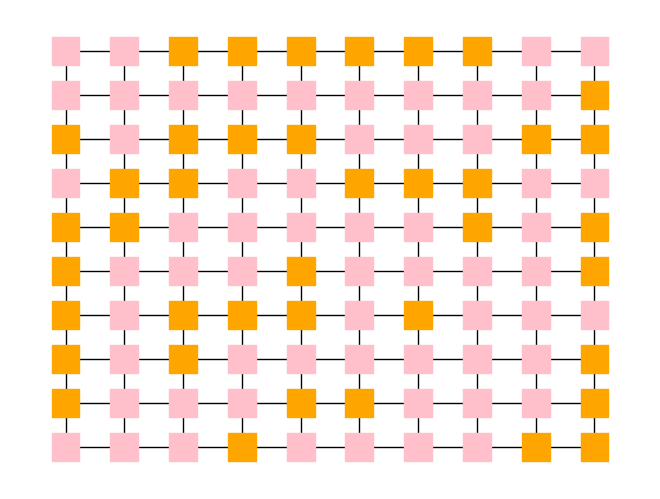

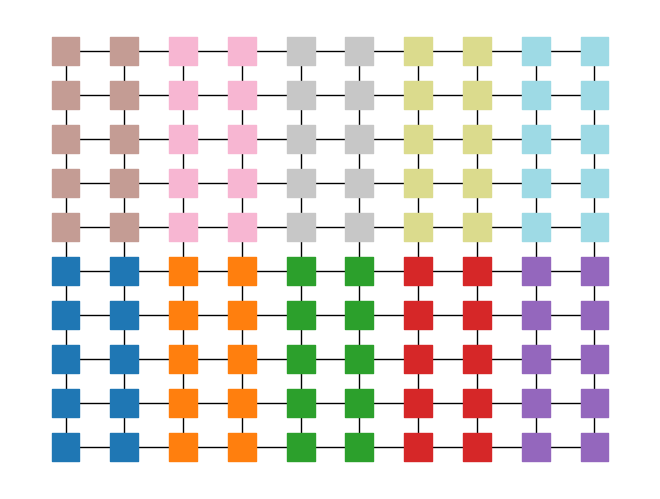

In [6]:
nx.draw(grid,pos={x:(grid.nodes()[x]['C_X'],grid.nodes()[x]['C_Y']) for x in grid.nodes()},node_color=[grid.nodes()[x]['color'] for x in grid.nodes()],node_shape='s',node_size=400)
plt.show()
nx.draw(grid,pos={x:(grid.nodes()[x]['C_X'],grid.nodes()[x]['C_Y']) for x in grid.nodes()},node_color=[grid.nodes()[x]['D5'] for x in grid.nodes()],node_shape='s',node_size=400,cmap='tab20')
plt.show()

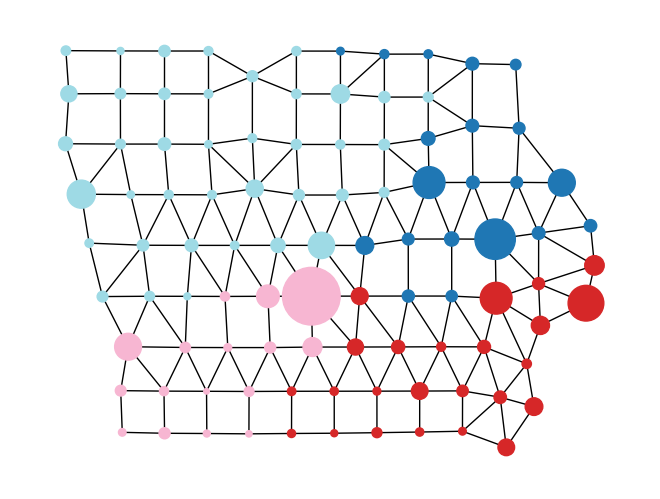

In [7]:
nx.draw(IA_Counties,pos={x:(IA_Counties.nodes[x]["C_X"],IA_Counties.nodes[x]["C_Y"]) for x in IA_Counties.nodes()},node_size = [IA_Counties.nodes[x]['TOTPOP']/250 for x in IA_Counties.nodes()],node_color = [int(IA_Counties.nodes[x]['CD']) for x in IA_Counties.nodes()],cmap='tab20')

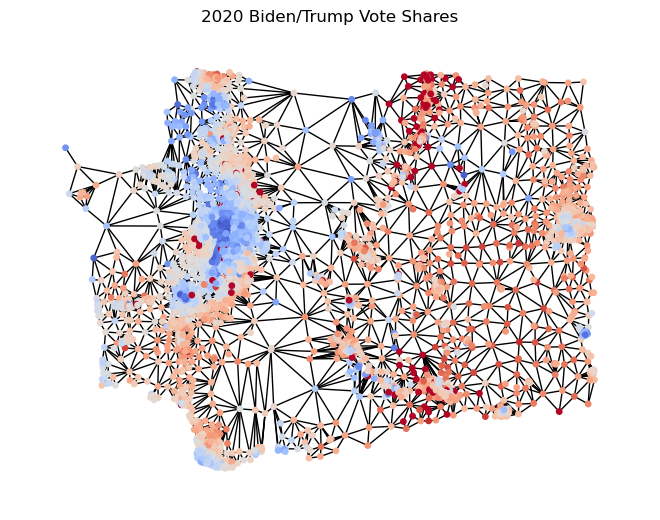

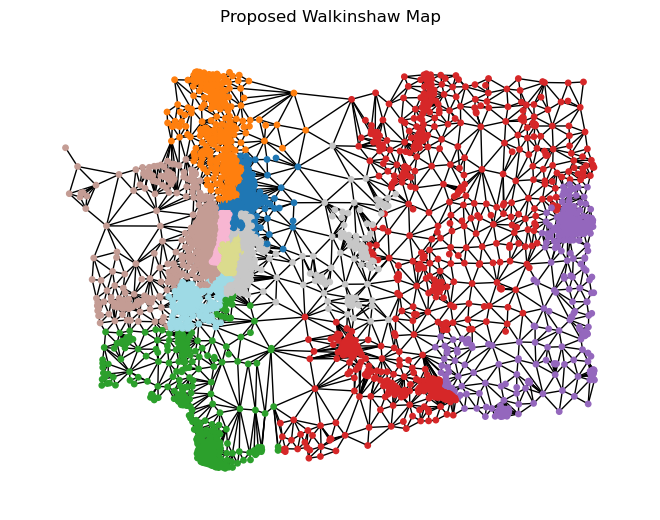

In [8]:
nx.draw(WA_2020,pos=[(WA_2020.nodes[n]["C_X"],WA_2020.nodes[n]["C_Y"]) for n in WA_2020.nodes()],node_size=15,node_color= [WA_2020.nodes[n]["G20PRSBIDE"]/(WA_2020.nodes[n]["G20PRSBIDE"]+WA_2020.nodes[n]["G20PRSTRUM"] +1 ) for n in WA_2020.nodes()],cmap='coolwarm_r')
plt.title("2020 Biden/Trump Vote Shares")
plt.show()
nx.draw(WA_2020,pos=[(WA_2020.nodes[n]["C_X"],WA_2020.nodes[n]["C_Y"]) for n in WA_2020.nodes()],node_size=15,node_color= [WA_2020.nodes[n]["Walkinshaw"] for n in WA_2020.nodes()],cmap='tab20')
plt.title("Proposed Walkinshaw Map")

plt.show()


In addition to files that are stored locally, you can also use the requests package to download .json files from the internet. For example, I maintain repositories of the COUNTY, COUSUB, TRACT, BG, and BLOCK units with annotations from the census like the example of Arkansas counties below: 

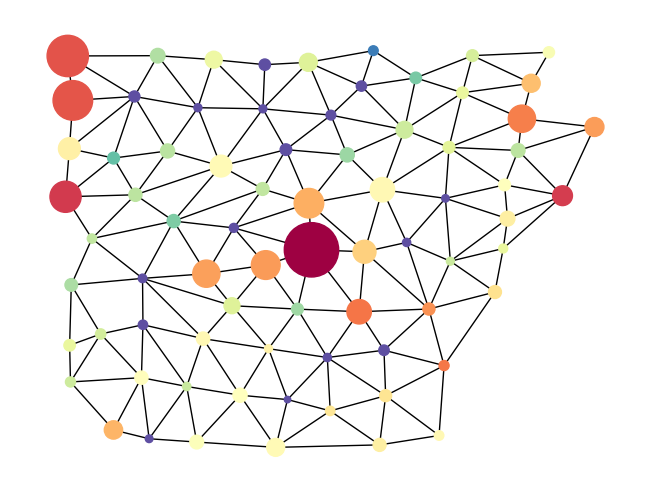

{'boundary_node': True,
 'boundary_perim': 1.3405285599667254,
 'area': 0.1847509792989995,
 'STATEFP10': '05',
 'COUNTYFP10': '107',
 'COUNTYNS10': '00069172',
 'GEOID10': '05107',
 'NAME10': 'Phillips',
 'NAMELSAD10': 'Phillips County',
 'LSAD10': '06',
 'CLASSFP10': 'H1',
 'MTFCC10': 'G4020',
 'CSAFP10': '0',
 'CBSAFP10': '25760',
 'METDIVFP10': 0,
 'FUNCSTAT10': 'A',
 'ALAND10': 1801758335,
 'AWATER10': 82056090,
 'INTPTLAT10': '+34.4258423',
 'INTPTLON10': '-090.8483856',
 'POP10': 21757,
 'UPOP': 11321.0,
 'RPOP': 10436,
 'C_X': -90.84802277201233,
 'C_Y': 34.428291607849424,
 'TOTPOP': 21757,
 'UTOTPOP': 11321.0,
 'RTOTPOP': 10436,
 'NH_WHITE': 7535,
 'UNH_WHITE': 2412.0,
 'RNH_WHITE': 5123,
 'NH_BLACK': 13652,
 'UNH_BLACK': 8652.0,
 'RNH_BLACK': 5000,
 'NH_AMIN': 39,
 'UNH_AMIN': 23.0,
 'RNH_AMIN': 16,
 'NH_ASIAN': 64,
 'UNH_ASIAN': 37.0,
 'RNH_ASIAN': 27,
 'NH_NHPI': 1,
 'UNH_NHPI': 1.0,
 'RNH_NHPI': 0,
 'NH_OTHER': 2,
 'UNH_OTHER': 1.0,
 'RNH_OTHER': 1,
 'NH_2MORE': 177,
 'UN

In [9]:
url = "https://people.csail.mit.edu/ddeford/COUNTY/COUNTY_05.json"
r = requests.get(url)
data = r.json()
AR_dual_graph = Graph(json_graph.adjacency_graph(data))

nx.draw(AR_dual_graph, pos = {x:(AR_dual_graph.nodes[x]['C_X'],AR_dual_graph.nodes[x]['C_Y']) for x in AR_dual_graph.nodes()},node_color = [AR_dual_graph.nodes[name]['RPOP']/AR_dual_graph.nodes[name]['TOTPOP'] for name in AR_dual_graph.nodes()], node_size = [AR_dual_graph.nodes[name]['TOTPOP']/250 for name in AR_dual_graph.nodes()],cmap = 'Spectral')
plt.show()

AR_dual_graph.nodes()[0]

**Assignment:** Experiment with the plotting functions and annotations above to make some visualizations of your own. 

# Shapefiles and MAUP

Often we need to do a fair amount of data processing and merging in order to create a usable dual graph. In order to perform redistricting analysis we need (at least!) the underlying geography of the state split into units, population data, demographic data, election data, and any current maps that we intend to analyze. Unfortunately, these datasets are often not associated to compatible units and so after gathering the underlying data sources we will need to move the data between levels of resolution to get a final combined dataset to build the dual graph from. 

Our main tool for this process is the MAUP (modified areal unit problem) package: https://github.com/mggg/maup whose documentation walks through nice examples of the main use cases of assigning smaller units to larger ones and (dis)aggregating data between units at different scales. The underlying geospatial data is commonly stored in a "shapefile" which is actually a collection of related files stored in the same directory. In Python these are most naturally accessed with the geopandas package, which loads them in as a tabular format like a standard dataframe containing a distinguished `geometry` column that contains the boundaries of each unit. 



In [10]:
import maup
import geopandas as gpd

The cell below loads in an already processed shapefile for Idaho as a geodataframe and makes visualizations like the ones we constructred from dual graphs above. 

In [11]:
ID = gpd.read_file("./ID_Processed_Precincts/ID_Processed_Precincts.shp")

In [12]:
ID.head()

,PRECINCTID,GEOID20,STATEFP,COUNTYFP,VAP_MOD,CON,SLD,C_X,C_Y,population,G20PRERTRU,G20PREDBID,G20USSRRIS,G20USSDJOR,geometry
0,011401,160010102292012,16,001,0,0,1,-116.481868,43.759750,2581,1191.00,385.99,1207.98,380.91,"POLYGON ((-116.48019 43.70648, -116.48174 43.7..."
1,011402,160010102291000,16,001,0,0,5,-116.433654,43.716937,4435,2212.99,663.02,2258.04,596.00,"POLYGON ((-116.45345 43.68922, -116.45344 43.6..."
2,011403,160010102241000,16,001,287,0,5,-116.359574,43.766645,3209,1437.97,582.99,1464.02,561.00,"POLYGON ((-116.39357 43.70997, -116.39356 43.7..."
3,011404,160010102261000,16,001,94,0,1,-116.501605,43.705755,4133,1864.97,478.00,1826.00,478.98,"POLYGON ((-116.51266 43.69598, -116.51266 43.6..."
4,011405,160010102271000,16,001,0,0,1,-116.472158,43.699948,3481,1435.96,509.99,1412.99,496.98,"POLYGON ((-116.49329 43.69202, -116.49329 43.6..."


(-117.5530036, -110.73351840000001, 41.6375488, 49.35147919999999)

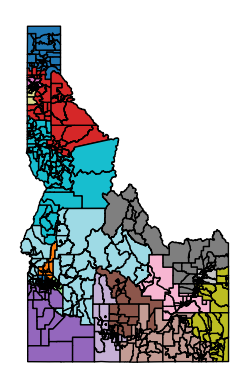

In [13]:
ID.plot(column = "SLD",linewidth=1,edgecolor='k',cmap='tab20')
plt.axis('off')

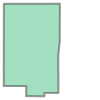

In [14]:
ID.loc[0,'geometry']

The next set of cells walks through the process of assembling a single shapefile for redistricting analysis in South Carolina. As a data source we'll use the redistricting data hub (https://redistrictingdatahub.org/) but there are other useful sources like github.com/mggg-data. 

We'll start by loading in a block shapefile which has the geographies and vote totals (note that this is already skipping a step, as we'd usually need to get a separate precinct shapefile and disaggregate the votes onto blocks), a separate shapefile that has population totals and demographic information at the block level from the census and then one file each for the Congressional, State House, and State Senate maps. 

**Note** The block files are too large for GitHub and can instead be downloaded in .zip format here: math.wsu.edu/faculty/ddeford/sc_2020_gen_2020_blocks.zip and here: math.wsu.edu/faculty/ddeford/sc_pl2020_b.zip

In [15]:
blocks = gpd.read_file("./SC/sc_2020_gen_2020_blocks/sc_2020_gen_2020_blocks.shp")


In [16]:
blocks.head()

,GEOID20,STATEFP,COUNTYFP,PRECINCTID,VAP_MOD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSRGRA,G20USSDHAR,G20USSCBLE,G20USSOWRI,geometry
0,450019501001000,45,001,Broadmouth - 006 - 1691,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,"POLYGON ((-82.31494 34.47108, -82.31490 34.471..."
1,450019501001001,45,001,Broadmouth - 006 - 1691,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,"POLYGON ((-82.30774 34.46242, -82.30770 34.462..."
2,450019501001002,45,001,Broadmouth - 006 - 1691,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,"POLYGON ((-82.31801 34.45619, -82.31772 34.457..."
3,450019501001003,45,001,Broadmouth - 006 - 1691,1,0.50,0.14,0.0,0.00,0.0,0.50,0.15,0.01,0.0,"POLYGON ((-82.33109 34.47168, -82.33096 34.471..."
4,450019501001004,45,001,Broadmouth - 006 - 1691,9,4.54,1.27,0.0,0.01,0.0,4.46,1.32,0.07,0.0,"POLYGON ((-82.32289 34.47598, -82.32265 34.476..."


In [17]:
block_pop = gpd.read_file("./SC/sc_pl2020_b/sc_pl2020_p1_b.shp")
#Warning! This one will take a while to load in 

In [18]:
block_pop.head()

,GEOID20,SUMLEV,LOGRECNO,GEOID,COUNTY,P0010001,P0010002,P0010003,P0010004,P0010005,...,P0010063,P0010064,P0010065,P0010066,P0010067,P0010068,P0010069,P0010070,P0010071,geometry
0,450790105021007,750,0188231,7500000US450790105021007,079,18,17,1,16,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-81.06670 34.03522, -81.06637 34.035..."
1,450790009001018,750,0184683,7500000US450790009001018,079,101,100,4,94,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-81.01657 34.02234, -81.01628 34.023..."
2,450790108061014,750,0188860,7500000US450790108061014,079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-80.99833 34.07611, -80.99826 34.076..."
3,450790106003064,750,0188401,7500000US450790106003064,079,23,23,1,22,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-81.02808 34.05752, -81.02799 34.057..."
4,450790105021039,750,0188263,7500000US450790105021039,079,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-81.07071 34.03445, -81.07033 34.034..."


In [19]:
blocks_w_pop = blocks.merge(block_pop[['GEOID20','P0010001','P0010003','P0010004']].set_index('GEOID20'),on="GEOID20")

In [20]:
blocks_w_pop['population'] = blocks_w_pop['P0010001']
blocks_w_pop.head()

,GEOID20,STATEFP,COUNTYFP,PRECINCTID,VAP_MOD,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,G20PREAFUE,G20USSRGRA,G20USSDHAR,G20USSCBLE,G20USSOWRI,geometry,P0010001,P0010003,P0010004,population
0,450019501001000,45,001,Broadmouth - 006 - 1691,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,"POLYGON ((-82.31494 34.47108, -82.31490 34.471...",0,0,0,0
1,450019501001001,45,001,Broadmouth - 006 - 1691,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,"POLYGON ((-82.30774 34.46242, -82.30770 34.462...",0,0,0,0
2,450019501001002,45,001,Broadmouth - 006 - 1691,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,"POLYGON ((-82.31801 34.45619, -82.31772 34.457...",0,0,0,0
3,450019501001003,45,001,Broadmouth - 006 - 1691,1,0.50,0.14,0.0,0.00,0.0,0.50,0.15,0.01,0.0,"POLYGON ((-82.33109 34.47168, -82.33096 34.471...",1,1,0,1
4,450019501001004,45,001,Broadmouth - 006 - 1691,9,4.54,1.27,0.0,0.01,0.0,4.46,1.32,0.07,0.0,"POLYGON ((-82.32289 34.47598, -82.32265 34.476...",16,15,1,16


In [21]:
blocks_w_pop['population'].sum()
#Checks out! 5,118,425

5118425

In [22]:
CON = gpd.read_file("./SC/sc_cong_adopted_2022/S865_Congress.shp")
SLDU = gpd.read_file("./SC/sc_sldu_2021/sc_sldu_2021.shp")
SLDL = gpd.read_file("./SC/sc_sldl_adopted_2024_shp/S1024.shp")


Now that we've loaded in the data and merged some important columns off the blocks we want to assign the blocks to the districts. For our later analysis we are actually going to use precincts instead but having already put the data together on blocks we might as well save the finished product. The following will generate a warning since we didn't project the data into a geographic projection, since we just projected everything to the CRS of the blocks. 

In [23]:
bk_to_CON = maup.assign(blocks_w_pop,CON)
bk_to_SLDU = maup.assign(blocks_w_pop,SLDU.to_crs(blocks_w_pop.crs))
bk_to_SLDL = maup.assign(blocks_w_pop,SLDL.to_crs(blocks_w_pop.crs))


C:\Users\daryl\anaconda3\Lib\site-packages\maup\intersections.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
C:\Users\daryl\anaconda3\Lib\site-packages\maup\intersections.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\daryl\anaconda3\Lib\site-packages\maup\assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)
C:\Users\daryl\anaconda3\Lib\site-packages\maup\intersections.py:49:

In [24]:
blocks_w_pop["CON"] = bk_to_CON
blocks_w_pop["SLDU"] = bk_to_SLDU
blocks_w_pop["SLDL"] = bk_to_SLDL



(-83.59665935, -78.25656965, 31.834977449999997, 35.37646155)

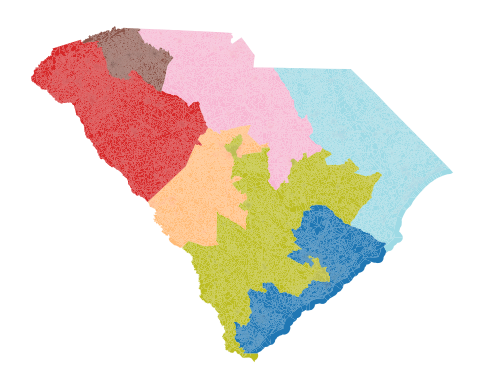

In [25]:
blocks_w_pop.plot(column="CON",cmap='tab20')
plt.axis('off')

(-83.59665935, -78.25656965, 31.834977449999997, 35.37646155)

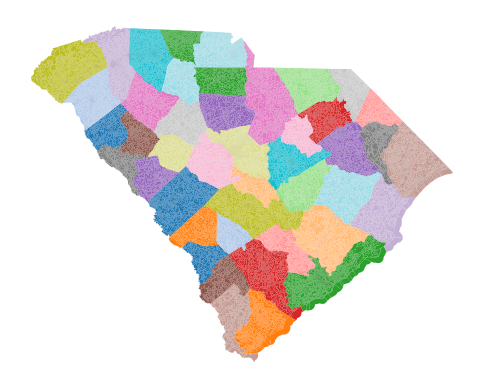

In [26]:
blocks_w_pop.plot(column="COUNTYFP",cmap='tab20')
plt.axis('off')

Next we'll aggregate the blocks back to precincts so we have fewer units to deal with in our ensemble analysis. 

In [27]:
precincts = blocks_w_pop[["PRECINCTID","geometry"]].dissolve(by="PRECINCTID")

In [28]:
precincts_w_pop = precincts.merge(blocks_w_pop.groupby("PRECINCTID")[['population','G20PRERTRU','G20PREDBID','G20USSRGRA','G20USSDHAR','P0010003','P0010004']].sum(),on="PRECINCTID")

In [29]:
precincts_w_pop=precincts_w_pop.merge(blocks_w_pop.groupby("PRECINCTID")["COUNTYFP"].max(),on="PRECINCTID")

In [30]:
precincts_w_pop['population'].sum()

5118425

(-83.59665935, -78.25656965, 31.834977449999997, 35.37646155)

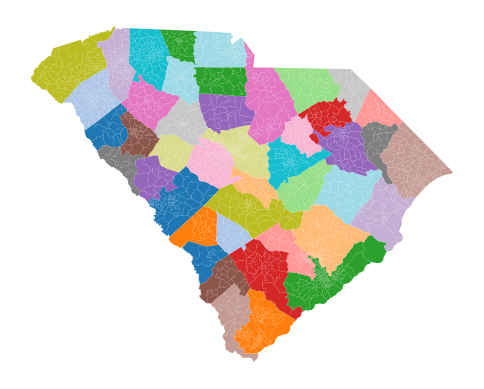

In [31]:
precincts_w_pop.plot(column="COUNTYFP",cmap='tab20')
plt.axis('off')

Now that we have a precinct file that we are happy with we need to match the districts to their corresponding precincts as well.

C:\Users\daryl\anaconda3\Lib\site-packages\maup\intersections.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
C:\Users\daryl\anaconda3\Lib\site-packages\maup\intersections.py:50: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
C:\Users\daryl\anaconda3\Lib\site-packages\maup\assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return assign_to_max(intersections(sources, targets, area_cutoff=0).area)
C:\Users\daryl\anaconda3\Lib\site-packages\maup\intersections.py:49:

(-83.59665935, -78.25656965, 31.834977449999997, 35.37646155)

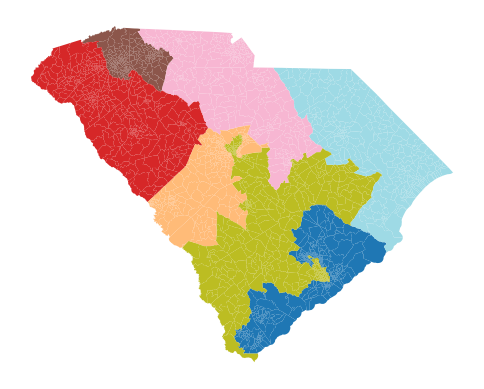

In [32]:
p_to_CON = maup.assign(precincts_w_pop,CON)
p_to_SLDU = maup.assign(precincts_w_pop,SLDU.to_crs(precincts_w_pop.crs))
p_to_SLDL = maup.assign(precincts_w_pop,SLDL.to_crs(precincts_w_pop.crs))

precincts_w_pop["CON"] = p_to_CON
precincts_w_pop["SLDU"] = p_to_SLDU
precincts_w_pop["SLDL"] = p_to_SLDL

precincts_w_pop.plot(column="CON",cmap='tab20')
plt.axis('off')

Finally, we'll attach centroids to the units so that we can visualize the eventual dual graphs. Once we have the final geodataframe constructed, building the dual graph and writing it to file is as simple as calling some built-in GerryChain functions. 

In [33]:
precincts_w_pop['C_X'] = precincts_w_pop.centroid.x
precincts_w_pop['C_Y'] = precincts_w_pop.centroid.y
blocks_w_pop['C_X'] = blocks_w_pop.centroid.x
blocks_w_pop['C_Y'] = blocks_w_pop.centroid.y

C:\Users\daryl\AppData\Local\Temp\ipykernel_23212\603903982.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  precincts_w_pop['C_X'] = precincts_w_pop.centroid.x
C:\Users\daryl\AppData\Local\Temp\ipykernel_23212\603903982.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  precincts_w_pop['C_Y'] = precincts_w_pop.centroid.y
C:\Users\daryl\AppData\Local\Temp\ipykernel_23212\603903982.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  blocks_w_pop['C_X'] = blocks_w_pop.centroid.x
C:\Users\daryl\AppData\Local\Temp\ipykernel_23212\603903982.py:4: UserWarning: Geometry is 

In [34]:
precinct_graph = Graph.from_geodataframe(precincts_w_pop)


precincts_w_pop.to_file("./SC/SC_Processed_Precincts.shp")

precinct_graph.to_json("./SC/SC_Processed_Precincts.json")


C:\Users\daryl\anaconda3\Lib\site-packages\gerrychain\graph\graph.py:179: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  areas = df.geometry.area.to_dict()


In [35]:
#Warning this one will take a while,
#skip unless you are doing it for your own state

"""
block_graph = Graph.from_geodataframe(blocks_w_pop)


blocks_w_pop.to_file("./SC/SC_Processed_Blocks.shp")

block_graph.to_json("./SC/SC_Processed_Blocks.json")
"""

'\nblock_graph = Graph.from_geodataframe(blocks_w_pop)\n\n\nblocks_w_pop.to_file("./SC/SC_Processed_Blocks.shp")\n\nblock_graph.to_json("./SC/SC_Processed_Blocks.json")\n'

**Assignment** Try this out on a state of your choice! Getting data from redistrictingdatahub requires creating a free account. 